# Práctica semanal

En esta práctica, trabajaremos dos proyectos distintos, uno de clasificación binaria y otro de clasificación multiclase. 

## Clasificación binaria

Nuestro dataset se encuentra en el archivo ``data/transfusion.csv``. Cada línea contiene información de donantes de sangre y tiene las siguientes columnas:

- ``meses_ultima``: número de meses desde la última donación de sangre
- ``frecuencia``: número de veces que la persona ha donado sangre
- ``volumen``: cantidad total de sangre (en ml) donada por la persona
- ``meses_primera``: número de meses desde la primera donación de sangre
- ``donante``: si la persona ha donado sangre durante el último mes

Nuestro propósito es construir la función ``es_donante(meses_ultima, frecuencia, volumen, meses_primera)`` la cual devuelve ``True`` si se predice que la persona donaría sangre el próximo mes, ``False`` si no.

In [147]:
# Cargamos bibliotecas importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.spatial import Delaunay

# Cargamos el dataset de transfusion
transfusion_data = pd.read_csv('data/transfusion.csv')
transfusion_data.head()

,meses_ultima,frecuencia,volumen,meses_primera,donante
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [148]:
# EJERCICIO (1pt): Colocar los datos en formato numpy

transfusion_x = np.array(transfusion_data[['meses_ultima', 'frecuencia','volumen','meses_primera']]) # Independientes: contiene las columnas meses_ultima, frecuencia, volumen y meses_primera
transfusion_y = np.array(transfusion_data[['donante']]).reshape(-1) # Dependiente: contiene la columna donante

In [149]:
# EJERCICIO (2pt): Entrenar un modelo de regresión logística con scikit-learn

transfusion_modelo = LogisticRegression()
transfusion_modelo.fit(transfusion_x, transfusion_y)

LogisticRegression()

In [150]:
# EJERCICIO (2pt): Crear una función de predicción
def es_donante(meses_ultima, frecuencia, volumen, meses_primera):
    prediction = transfusion_modelo.predict([[meses_ultima, frecuencia, volumen, meses_primera]])
    # Devuelve True si se predice como donante, False si no
    return prediction[0]==1

In [151]:
# --- CELDA PARA PROBAR SU MODELO UNA VEZ ESTÉ ENTRENADO --- #

## Precisión del modelo debe ser aproximadamente 0.77
print('Precisión: ', (transfusion_modelo.predict(transfusion_x) == transfusion_y).mean())

# Debe dar False
print('es_donante(3, 20, 1000, 8): ', es_donante(3, 20, 1000, 8))

# Debe dar True
print('es_donante(6, 12, 5000, 20): ', es_donante(6, 12, 5000, 20))


Precisión:  0.7713903743315508
es_donante(3, 20, 1000, 8):  False
es_donante(6, 12, 5000, 20):  True


## Clasificación multiclase

Nuestro dataset se encuentra en el archivo ``data/provincias.csv``, el cual contiene 484 observaciones de puntos de latitud (columna ``lat``) y longitud (columna ``long``) en el territorio nacional, con una variable ``provincia`` que indica en qué provincia se ubica cada punto. 

Nuestro propósito es construir una función ``cual_provincia(latitud, longitud)`` la cual devuelve el nombre de la provincia y su probabilidad correspondiente. 

In [152]:
# Cargamos el dataset de provincias
provincias_data = pd.read_csv('data/provincias_scaled.csv')
provincias_data.head()

,long,lat,provincia
0,0.504035,0.603322,ALAJUELA
1,0.445985,0.603681,ALAJUELA
2,0.518164,0.629551,ALAJUELA
3,0.504035,0.603322,ALAJUELA
4,0.488361,0.582191,ALAJUELA


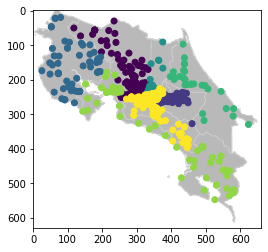

In [153]:
# Y mostramos los puntos en el mapa
# Primero, codifiquemos las provincias en 0-6
le = preprocessing.LabelEncoder()
le.fit(provincias_data['provincia'])
c = le.transform(provincias_data['provincia'])
# Leemos el archivo
im = plt.imread('data/mapaCR.png')
implot = plt.imshow(im)

# Escalamos los arrays en 0-1
p_long = provincias_data['long']
p_lat = provincias_data['lat']

# Dibujamos (con un pequeño offset empírico para que caiga en la imágen)
plt.scatter((im.shape[0]*p_long)*0.95 + 25, (im.shape[1]*(1-p_lat))*0.8 + 20, c=c)

In [154]:
# EJERCICIO (2pt): Entrenar un modelo de regresión softmax para distinguir la probabilidad de que un punto 
# esté en cada provincia
# *** NOTA IMPORTANTE: para los datos de entrenamiento, vamos a utilizar los arrays escalados "p_long" y "p_lat"
scaler = StandardScaler()

arr_x = np.array((p_long,p_lat)).T

arr_y = provincias_data['provincia']

X_train, X_test, y_train, y_test = train_test_split(arr_x, arr_y, test_size=0.1, random_state=42)

provincias_model = LogisticRegression(multi_class='multinomial', max_iter=1000)

provincias_model.fit(X_train,y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [155]:
# EJERCICIO (2pt): Función que devuelve un diccionario con la probabilidad de que un punto (longitud, latitud) 
# se encuentre en una provincia dada, 
# p.ej. {'ALAJUELA': 0.3, 'CARTAGO': 0.1, 'PUNTARENAS': 0.1, 
#        'LIMON': 0.1 'GUANACASTE': 0.1, 'HEREDIA': 0.2, 'SAN JOSE': 0.1}

def prob_provincias(long, lat):
    probs=provincias_model.predict_proba([[long,lat]])
    dic ={
        le.inverse_transform([0])[0]:probs[0][0],
        le.inverse_transform([1])[0]:probs[0][1],
        le.inverse_transform([2])[0]:probs[0][2],
        le.inverse_transform([3])[0]:probs[0][3],
        le.inverse_transform([4])[0]:probs[0][4],
        le.inverse_transform([5])[0]:probs[0][5],
        le.inverse_transform([6])[0]:probs[0][6]
    }
    return dic

In [156]:
# EJERCICIO (1pt): Función que devuelve la provincia de mayor probabilidad a la que un punto (longitud, latitud)
# pertenece.

def cual_provincia(long, lat):
    return provincias_model.predict([[long,lat]])[0]

In [1]:
# --- CELDA PARA PROBAR SU MODELO UNA VEZ ESTÉ ENTRENADO --- #
points = np.array((p_long, p_lat)).T
hull = Delaunay(points)

samples = np.random.rand(20000,2)
samples = np.array([x for x in samples if hull.find_simplex(x) >= 0]).T

y_prima = le.transform(provincias_model.predict(samples.reshape(-1,1)))


NameError: name 'np' is not defined

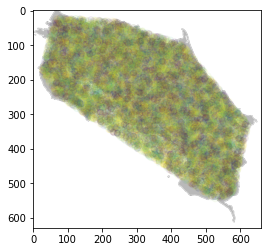

In [169]:
im = plt.imread('data/mapaCR.png')
implot = plt.imshow(im)

plt.scatter((samples[0]*im.shape[0])*0.95 + 25, ((1.0-samples[1])*im.shape[1])*0.8 + 20, c=y_prima, alpha=0.05)

In [166]:
y_prima

array([2, 0, 0, ..., 0, 5, 6])